# Librerías


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/data_for_ml.csv')
df.sample(3)

,Dog breed,lifetime_cost,intellingence_ranking,longevity,weight_kg,shoulder_height_cm,obey_first_command_%_of_time,Renta media/pers (€),Áreas caninas (m²),n_genetic_diseases,tricks_yes,size_category_enc,intelligence_category_enc,house_type_enc,owners_physical_activity_enc
1421,Clumber Spaniel,17835.947871,54.864670,10.011947,34.437754,45.359733,70,20671.0,1852.0,0,1.0,1.0,3.0,3.0,1.0
485,English Springer Spaniel,22174.880335,87.063407,11.796634,19.204147,51.447646,85,19199.0,326.0,3,1.0,1.0,4.0,1.0,0.0
1433,Clumber Spaniel,18670.010731,58.005489,9.907706,32.570715,50.159201,95,20103.0,1764.0,0,0.0,1.0,3.0,1.0,3.0


## Cambio de int_cat de 6 clases a 3 clases

In [3]:
df['intelligence_category_enc'].unique()

mapping= {0:0, 1:0, 2:1, 3:1, 4:2, 5:2}

df['int_cat_enc_fixed'] = df['intelligence_category_enc'].map(mapping)

df['int_cat_enc_fixed'].unique()

array([2, 1, 0])

# X e ys para entrenar a los modelos

In [4]:
X_int_cat = df[['Renta media/pers (€)','size_category_enc', 'longevity', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']]
y_int_cat = df['int_cat_enc_fixed']

In [5]:
X_tam_cat = df[['Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']]
y_tam_cat = df['size_category_enc']

# Clasificación int_cat_enc con cross_val_predict

## Pipelines y GridSearchs

### Logistic Regression

In [7]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
grid_params_lr = {
    'lr__C': [0.001,0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
gs_lr = GridSearchCV(pipe_lr, grid_params_lr, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [8]:
gs_lr.fit(X_int_cat,y_int_cat)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                   0.8, 0.9, 1]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [9]:
df_gs_lr = pd.DataFrame(gs_lr.cv_results_['params'])
df_gs_lr['test_result'] = gs_lr.cv_results_['mean_test_score']
df_gs_lr['train_result'] = gs_lr.cv_results_['mean_train_score']
df_gs_lr

,lr__C,test_result,train_result
0,0.001,0.335337,0.478656
1,0.100,0.378275,0.520650
2,0.200,0.378868,0.520779
3,0.300,0.378202,0.521060
4,0.400,0.378202,0.521657
5,0.500,0.378202,0.521657
6,0.600,0.377845,0.521657
7,0.700,0.377847,0.521627
8,0.800,0.377847,0.521627
9,0.900,0.377847,0.521627


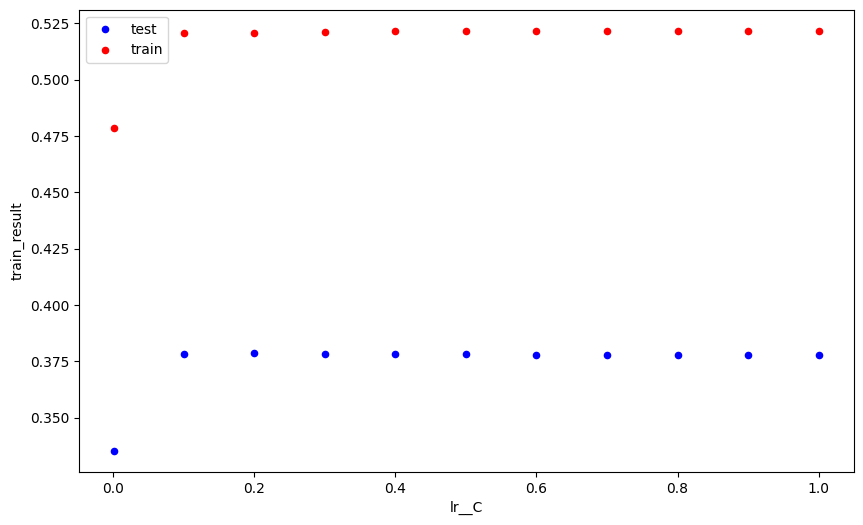

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_lr.plot.scatter('lr__C', 'test_result', label='test', ax=ax, color='blue')
df_gs_lr.plot.scatter('lr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

El mejor es 0.1, ya que es en el que hay menos diferencia entre train y test.

### Decission Tree

In [11]:
pipe_dt = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])
grid_params_dt = {
    'dt__max_depth': [4],
    'dt__min_samples_leaf': [5,10,15,20]
}
gs_dt = GridSearchCV(pipe_dt, grid_params_dt, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [12]:
gs_dt.fit(X_int_cat,y_int_cat)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [4],
                         'dt__min_samples_leaf': [5, 10, 15, 20]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [13]:
df_gs_dt = pd.DataFrame(gs_dt.cv_results_['params'])
df_gs_dt['test_result'] = gs_dt.cv_results_['mean_test_score']
df_gs_dt['train_result'] = gs_dt.cv_results_['mean_train_score']
df_gs_dt.head(3)

,dt__max_depth,dt__min_samples_leaf,test_result,train_result
0,4,5,0.544558,0.628870
1,4,10,0.523316,0.631774
2,4,15,0.523316,0.631497


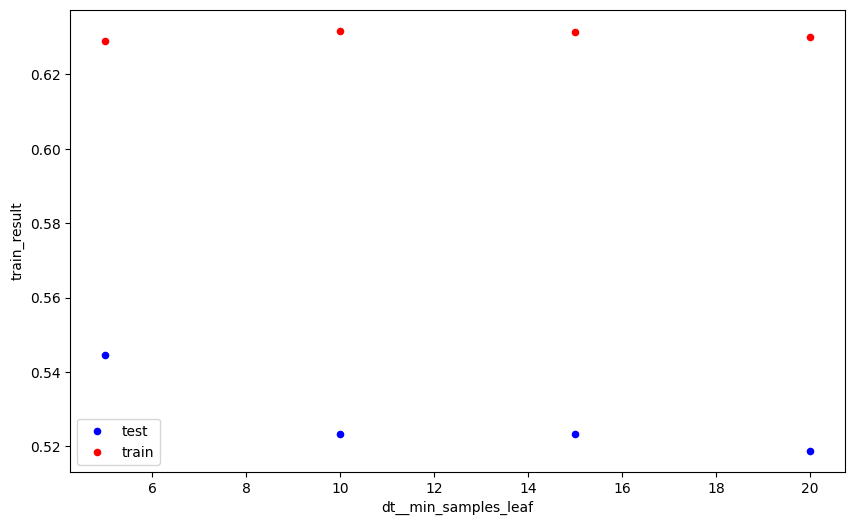

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_dt.plot.scatter('dt__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_gs_dt.plot.scatter('dt__min_samples_leaf', 'train_result', label='train', ax=ax, color='red')
plt.legend()

El mejor dt__max_depth es 4, ya que es cuando el test deja de subir, aunque de igual manera hay mucha diferencia entre train y test.

El dt__min_samples_split no genera ninguna diferencia. Se descarta y se deja solo el max_depth.

Se mete dt_min_samples_leaf en sustitución. El mejor es 5.

### KNN

In [15]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
grid_params_knn = {
    'knn__n_neighbors' : [110],
    'knn__metric': ['euclidean', 'manhattan']
}
gs_knn = GridSearchCV(pipe_knn, grid_params_knn, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [16]:
gs_knn.fit(X_int_cat,y_int_cat)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [110]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [17]:
df_gs_knn = pd.DataFrame(gs_knn.cv_results_['params'])
df_gs_knn['test_result'] = gs_knn.cv_results_['mean_test_score']
df_gs_knn['train_result'] = gs_knn.cv_results_['mean_train_score']
df_gs_knn.head(3)

,knn__metric,knn__n_neighbors,test_result,train_result
0,euclidean,110,0.514332,0.588578
1,manhattan,110,0.510116,0.603271


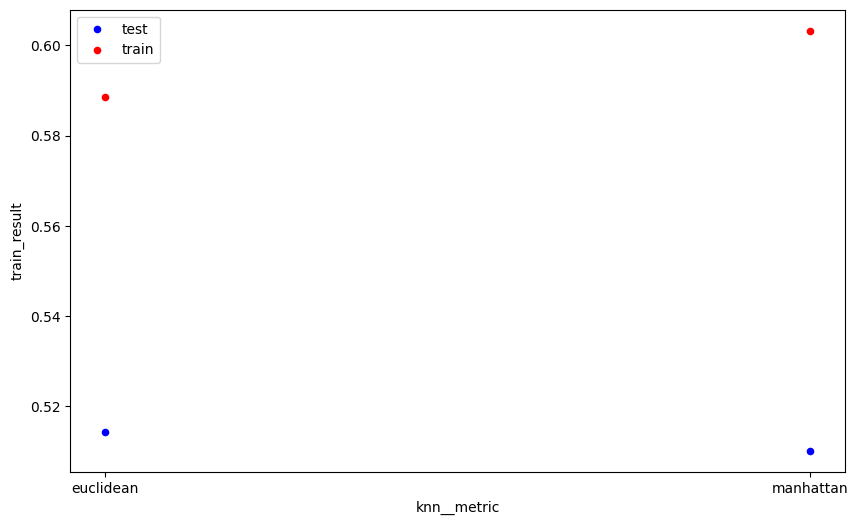

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_knn.plot.scatter('knn__metric', 'test_result', label='test', ax=ax, color='blue')
df_gs_knn.plot.scatter('knn__metric', 'train_result', label='train', ax=ax, color='red')
plt.legend()

knn_metric la mejor es la euclidean, o la distancia euclídea en vez de la manhattan. Tienen valores similares, pero en la euclídea hay menos diferencia entre train y test.

knn__n_neighbours es 110.

### SVM

In [19]:
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
grid_params_svc = {
    'svc__C': [0.001,0.05,0.1,0.2,0.4,0.5,1],
    'svc__kernel': ['rbf']#, 'poly','linear', ]
}
gs_svc = GridSearchCV(pipe_svc, grid_params_svc, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [20]:
gs_svc.fit(X_int_cat,y_int_cat)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.05, 0.1, 0.2, 0.4, 0.5, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [21]:
df_gs_svc = pd.DataFrame(gs_svc.cv_results_['params'])
df_gs_svc['test_result'] = gs_svc.cv_results_['mean_test_score']
df_gs_svc['train_result'] = gs_svc.cv_results_['mean_train_score']
df_gs_svc.head(3)

,svc__C,svc__kernel,test_result,train_result
0,0.001,rbf,0.154834,0.154833
1,0.050,rbf,0.500476,0.563058
2,0.100,rbf,0.510825,0.600400


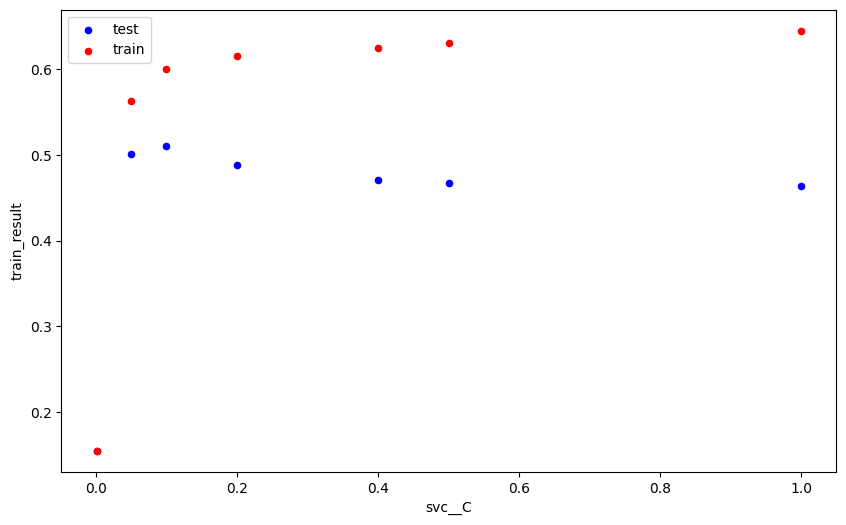

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_svc.plot.scatter('svc__C', 'test_result', label='test', ax=ax, color='blue')
df_gs_svc.plot.scatter('svc__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

El svc__kernel que mejor resultados da es 'rbf', y tiene una distancia de train y test similar a la del de rbf, así que es mejor poly.

El svc__C mejor es 0.1, lo cual concuerda con lo que dicen en internet.

### Random Forest Classifier

In [23]:
pipe_rfc = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier())])
grid_params_rfc = {
    'rfc__n_estimators' : [100,70,80,90,110,120,150,200],
    'rfc__max_depth': [2]#,1,3,4,5,6,7]
}
gs_rfc = GridSearchCV(pipe_rfc, grid_params_rfc, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [24]:
gs_rfc.fit(X_int_cat,y_int_cat)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [2],
                         'rfc__n_estimators': [100, 70, 80, 90, 110, 120, 150,
                                               200]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [25]:
df_gs_rfc = pd.DataFrame(gs_rfc.cv_results_['params'])
df_gs_rfc['test_result'] = gs_rfc.cv_results_['mean_test_score']
df_gs_rfc['train_result'] = gs_rfc.cv_results_['mean_train_score']
df_gs_rfc.head(3)

,rfc__max_depth,rfc__n_estimators,test_result,train_result
0,2,100,0.529427,0.603545
1,2,70,0.527000,0.603228
2,2,80,0.524155,0.595974


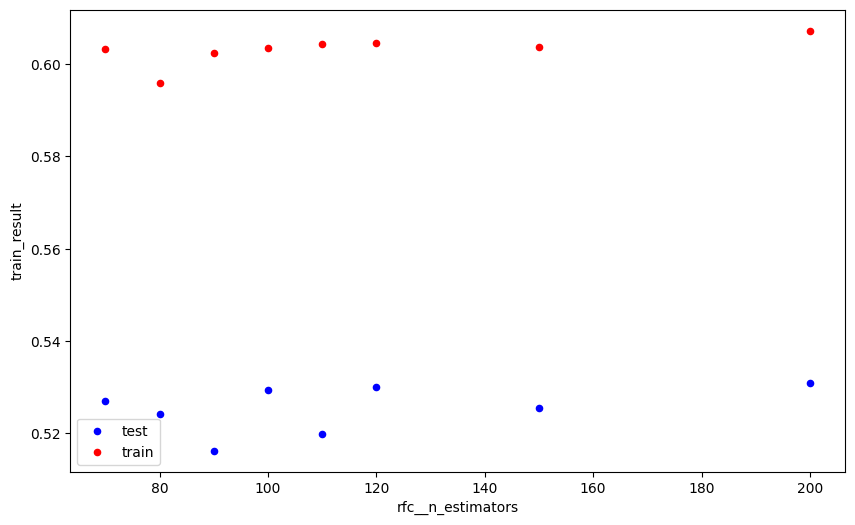

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_rfc.plot.scatter('rfc__n_estimators', 'test_result', label='test', ax=ax, color='blue')
df_gs_rfc.plot.scatter('rfc__n_estimators', 'train_result', label='train', ax=ax, color='red')
plt.legend()

En el rfc__n_estimators no parece haber gran diferencia en aumento del test, o en disminución del gap entre train y test, así que se utilizará 110, ya que al parecer el máximo de test está ahí.

Y en el caso de rfc__max_depth el mejor sería 2.

## Modelos óptimos + predicciones

In [27]:
## Logistic Regression:
pipe_final_lr_int = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=0.1))])
model_final_lr_int = pipe_final_lr_int.fit(X_int_cat, y_int_cat)
y_lr_pred = model_final_lr_int.predict(X_int_cat)

## Decission Tree:
pipe_final_dt_int = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(max_depth=4, min_samples_leaf=5))])
model_final_dt_int = pipe_final_dt_int.fit(X_int_cat, y_int_cat)
y_dt_pred = model_final_dt_int.predict(X_int_cat)

## K-nearest Neighbours:
pipe_final_knn_int = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(metric='euclidean',n_neighbors=110))])
model_final_knn_int = pipe_final_knn_int.fit(X_int_cat, y_int_cat)
y_knn_pred = model_final_knn_int.predict(X_int_cat)

## SVM Classifier:
pipe_final_svc_int = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf',C=0.1))])
model_final_svc_int = pipe_final_svc_int.fit(X_int_cat, y_int_cat)
y_svc_pred = model_final_svc_int.predict(X_int_cat)

## Random Forest Classifier:
pipe_final_rfc_int = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(n_estimators=110,max_depth=2))])
model_final_rfc_int = pipe_final_rfc_int.fit(X_int_cat, y_int_cat)
y_rfc_pred = model_final_rfc_int.predict(X_int_cat)

## Viz y Resultados --> Inteligencia

### Matrices de Confusión

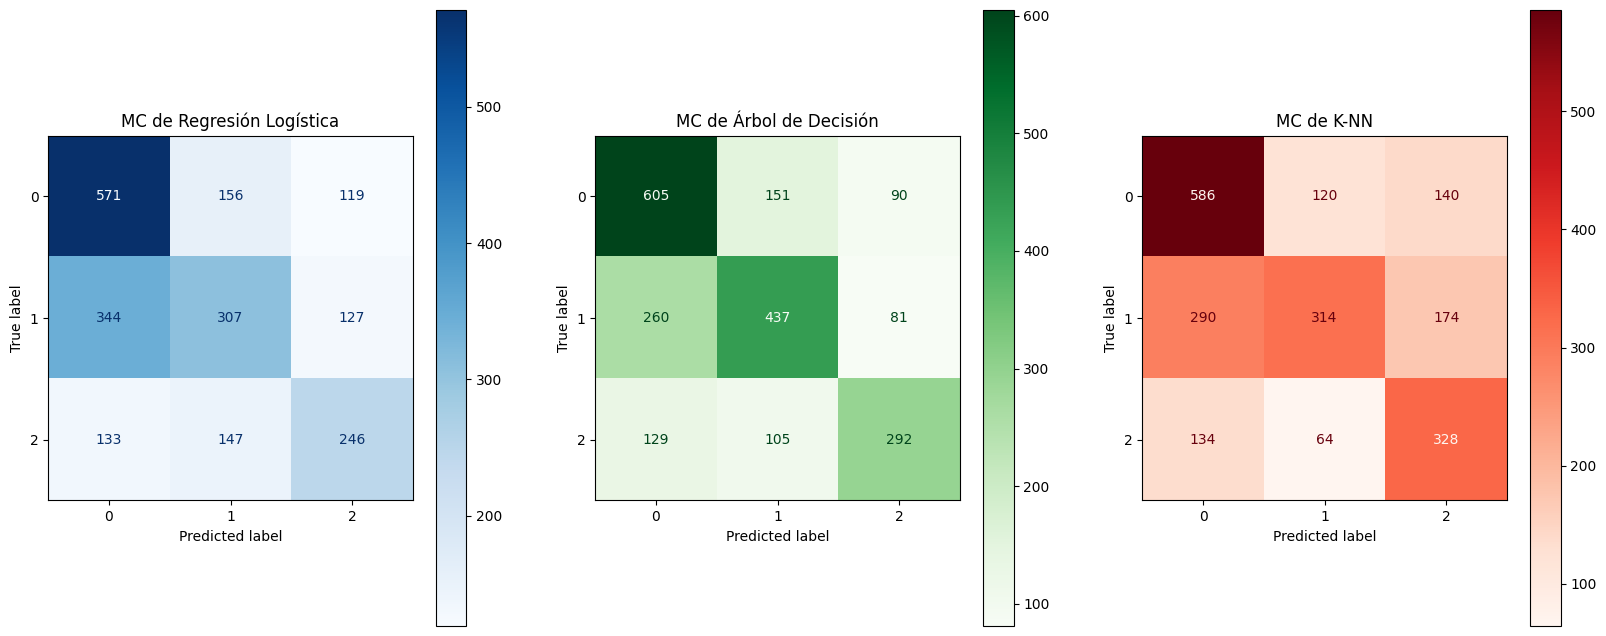

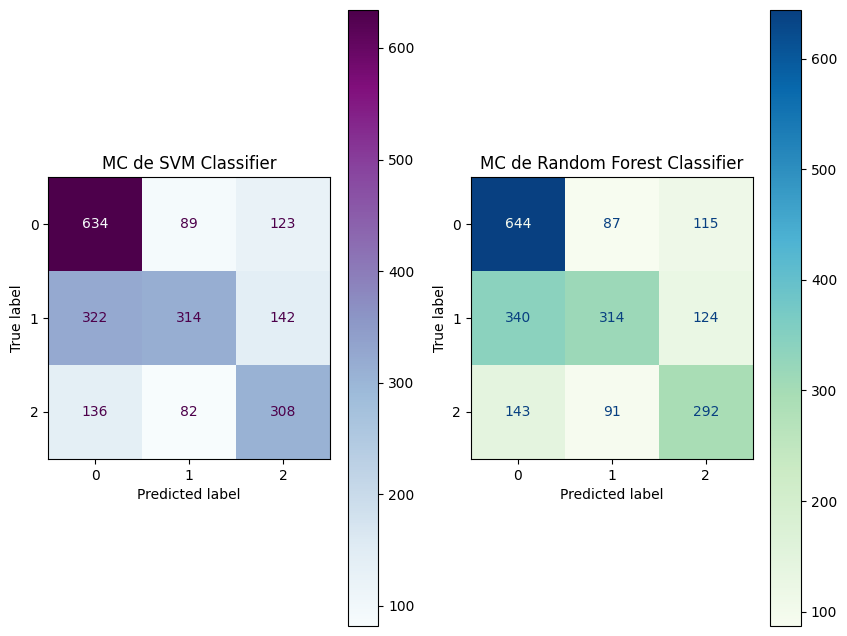

In [28]:
cm_lr = confusion_matrix(y_int_cat, y_lr_pred)
cm_dt = confusion_matrix(y_int_cat, y_dt_pred)
cm_knn = confusion_matrix(y_int_cat, y_knn_pred)
cm_svc = confusion_matrix(y_int_cat, y_svc_pred)
cm_rfc = confusion_matrix(y_int_cat, y_rfc_pred)


fig, axs = plt.subplots(1, 3, figsize=(20,8))

cm_lr_display = ConfusionMatrixDisplay(cm_lr).plot(ax=axs[0], cmap='Blues')
axs[0].set_title('MC de Regresión Logística')
ccm_dt_display = ConfusionMatrixDisplay(cm_dt).plot(ax=axs[1], cmap='Greens')
axs[1].set_title('MC de Árbol de Decisión')
cm_knn_display = ConfusionMatrixDisplay(cm_knn).plot(ax=axs[2], cmap='Reds')
axs[2].set_title('MC de K-NN')

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,8))

cm_svc_display = ConfusionMatrixDisplay(cm_svc).plot(ax=axs[0], cmap='BuPu')
axs[0].set_title('MC de SVM Classifier')
ccm_rfc_display = ConfusionMatrixDisplay(cm_rfc).plot(ax=axs[1], cmap='GnBu')
axs[1].set_title('MC de Random Forest Classifier')

plt.show()

### Informes / Reports de Clasificación (Métricas)

In [29]:
print (f'Report de clasificación de la Regresión Logística:\n{classification_report(y_int_cat, y_lr_pred)}\n')
print (f'Report de clasificación del Árbol de Decisión:\n{classification_report(y_int_cat, y_dt_pred)}\n')
print (f'Report de clasificación del K-Nearest Neighbours:\n{classification_report(y_int_cat, y_knn_pred)}\n')
print (f'Report de clasificación del SVM (Clasifier):\n{classification_report(y_int_cat, y_svc_pred)}\n')
print (f'Report de clasificación del Random Forest Clasifier:\n{classification_report(y_int_cat, y_rfc_pred)}')

Report de clasificación de la Regresión Logística:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       846
           1       0.50      0.39      0.44       778
           2       0.50      0.47      0.48       526

    accuracy                           0.52      2150
   macro avg       0.52      0.51      0.51      2150
weighted avg       0.52      0.52      0.52      2150


Report de clasificación del Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       846
           1       0.63      0.56      0.59       778
           2       0.63      0.56      0.59       526

    accuracy                           0.62      2150
   macro avg       0.62      0.61      0.61      2150
weighted avg       0.62      0.62      0.62      2150


Report de clasificación del K-Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.58      0.69

## Conclusiones inteligencia:

Con 3 clases conseguimos una pprecisión máxima promedio de 0.62 en el árbol de decisión, por lo que es el que vamos a guardar como modelo óptimo de machine learning de clasificación para la inteligencia.

In [31]:
pickle.dump(model_final_dt_int , open("Models/modelo_dt_int_final.pkl", "wb"))

# Clasificación tam_cat_enc con cross_val_predict

## Pipelines y GridSearchs

### Logistic Regression

In [32]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
grid_params_lr = {
    'lr__C': [0.001,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
gs_lr = GridSearchCV(pipe_lr, grid_params_lr, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [33]:
gs_lr.fit(X_tam_cat,y_tam_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [34]:
df_gs_lr = pd.DataFrame(gs_lr.cv_results_['params'])
df_gs_lr['test_result'] = gs_lr.cv_results_['mean_test_score']
df_gs_lr['train_result'] = gs_lr.cv_results_['mean_train_score']
df_gs_lr

,lr__C,test_result,train_result
0,0.001,0.425157,0.426046
1,0.100,0.513390,0.545756
2,0.300,0.512499,0.546905
3,0.400,0.511392,0.547449
4,0.500,0.511392,0.547866
5,0.600,0.511392,0.547866
6,0.700,0.511392,0.547866
7,0.800,0.511392,0.547866
8,0.900,0.511392,0.548144
9,1.000,0.511392,0.548144


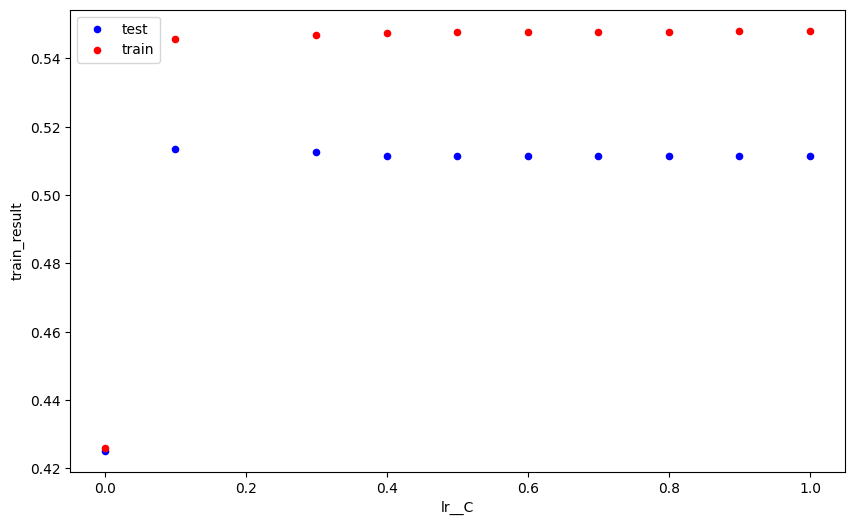

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_lr.plot.scatter('lr__C', 'test_result', label='test', ax=ax, color='blue')
df_gs_lr.plot.scatter('lr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

Creo que el mejor es lr__C=0.5, pero no estoy 100% seguro.

### Decission Tree

In [36]:
pipe_dt = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])
grid_params_dt = {
    'dt__max_depth': [2,3,4,5,6,7],
    'dt__min_samples_leaf': [50]#,10,30,70,100]
}
gs_dt = GridSearchCV(pipe_dt, grid_params_dt, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [37]:
gs_dt.fit(X_tam_cat,y_tam_cat)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [2, 3, 4, 5, 6, 7],
                         'dt__min_samples_leaf': [50]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [38]:
df_gs_dt = pd.DataFrame(gs_dt.cv_results_['params'])
df_gs_dt['test_result'] = gs_dt.cv_results_['mean_test_score']
df_gs_dt['train_result'] = gs_dt.cv_results_['mean_train_score']
df_gs_dt.head(3)

,dt__max_depth,dt__min_samples_leaf,test_result,train_result
0,2,50,0.666022,0.661714
1,3,50,0.610567,0.614448
2,4,50,0.647426,0.642649


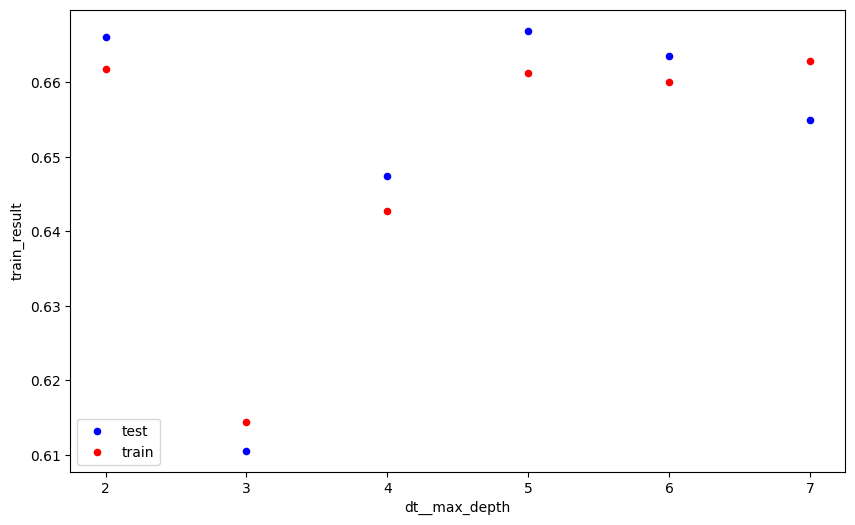

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_dt.plot.scatter('dt__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_gs_dt.plot.scatter('dt__max_depth', 'train_result', label='train', ax=ax, color='red')
plt.legend()

El mejor dt__max_depth es 2, ya que es cuando el test deja de subir, aunque de igual manera hay mucha diferencia entre train y test.

El dt__min_samples_leaf mejor es de 50.

### KNN

In [40]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
grid_params_knn = {
    'knn__n_neighbors' : [50,60,70,80,90],
    'knn__metric': ['manhattan']#,'euclidean']
}
gs_knn = GridSearchCV(pipe_knn, grid_params_knn, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [41]:
gs_knn.fit(X_tam_cat,y_tam_cat)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan'],
                         'knn__n_neighbors': [50, 60, 70, 80, 90]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [42]:
df_gs_knn = pd.DataFrame(gs_knn.cv_results_['params'])
df_gs_knn['test_result'] = gs_knn.cv_results_['mean_test_score']
df_gs_knn['train_result'] = gs_knn.cv_results_['mean_train_score']
df_gs_knn.head(3)

,knn__metric,knn__n_neighbors,test_result,train_result
0,manhattan,50,0.622868,0.667858
1,manhattan,60,0.635150,0.662209
2,manhattan,70,0.632919,0.661318


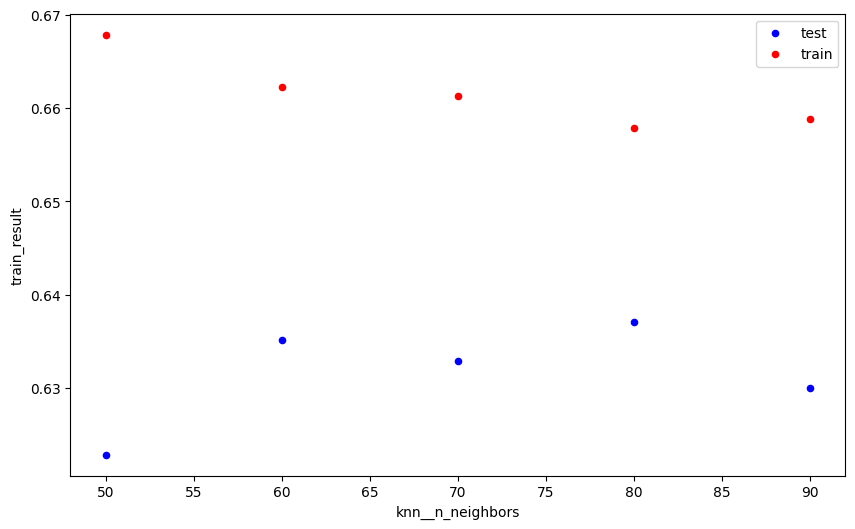

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_knn.plot.scatter('knn__n_neighbors', 'test_result', label='test', ax=ax, color='blue')
df_gs_knn.plot.scatter('knn__n_neighbors', 'train_result', label='train', ax=ax, color='red')
plt.legend()

knn_metric mejor manhattan.

knn__n_neighbours, el mejor parece ser el de 70.

### SVM

In [44]:
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
grid_params_svc = {
    'svc__C': [1.5],#,0.1,0.5,1,1.5,2,3],
    'svc__kernel': ['rbf','poly','linear']
}
gs_svc = GridSearchCV(pipe_svc, grid_params_svc, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [45]:
gs_svc.fit(X_tam_cat,y_tam_cat)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1.5],
                         'svc__kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [46]:
df_gs_svc = pd.DataFrame(gs_svc.cv_results_['params'])
df_gs_svc['test_result'] = gs_svc.cv_results_['mean_test_score']
df_gs_svc['train_result'] = gs_svc.cv_results_['mean_train_score']
df_gs_svc.head(3)

,svc__C,svc__kernel,test_result,train_result
0,1.5,rbf,0.638483,0.676803
1,1.5,poly,0.585691,0.637054
2,1.5,linear,0.536242,0.559089


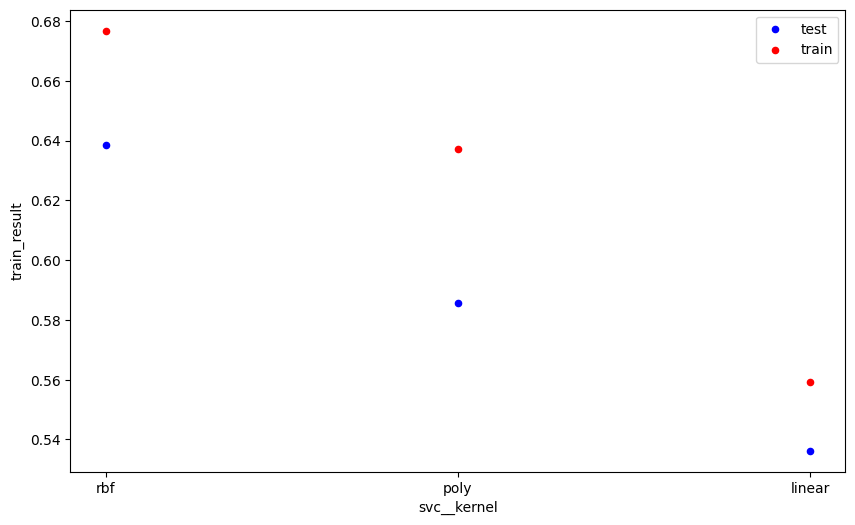

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_svc.plot.scatter('svc__kernel', 'test_result', label='test', ax=ax, color='blue')
df_gs_svc.plot.scatter('svc__kernel', 'train_result', label='train', ax=ax, color='red')
plt.legend()

El svc__kernel que mejor resultados da es 'rbf'.

El svc__C mejor parece ser 1.5.

### Random Forest Classifier

In [48]:
pipe_rfc = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier())])
grid_params_rfc = {
    'rfc__n_estimators' : [100,80,90,110,120],
    'rfc__max_depth': [3]#,2,3,4,5,7,10,15]
}
gs_rfc = GridSearchCV(pipe_rfc, grid_params_rfc, cv = 5, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [49]:
gs_rfc.fit(X_tam_cat,y_tam_cat)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [3],
                         'rfc__n_estimators': [100, 80, 90, 110, 120]},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [50]:
df_gs_rfc = pd.DataFrame(gs_rfc.cv_results_['params'])
df_gs_rfc['test_result'] = gs_rfc.cv_results_['mean_test_score']
df_gs_rfc['train_result'] = gs_rfc.cv_results_['mean_train_score']
df_gs_rfc.head(3)

,rfc__max_depth,rfc__n_estimators,test_result,train_result
0,3,100,0.659146,0.661789
1,3,80,0.647822,0.663917
2,3,90,0.656403,0.662246


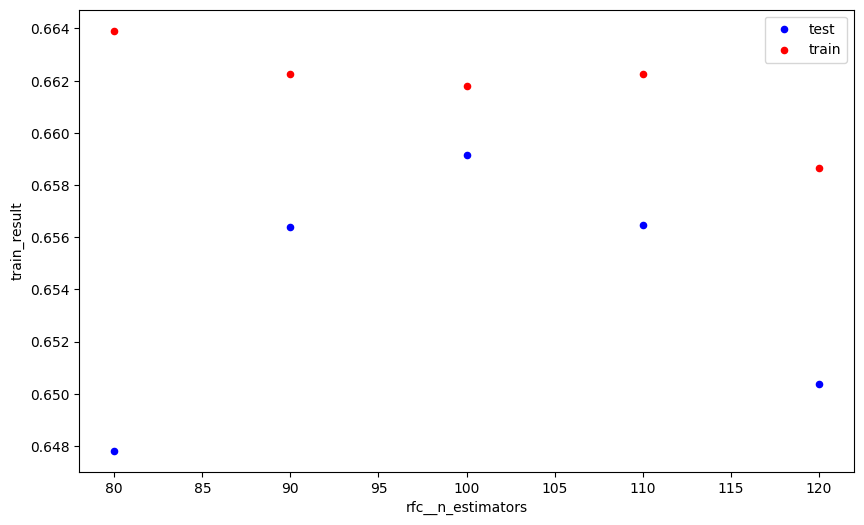

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
df_gs_rfc.plot.scatter('rfc__n_estimators', 'test_result', label='test', ax=ax, color='blue')
df_gs_rfc.plot.scatter('rfc__n_estimators', 'train_result', label='train', ax=ax, color='red')
plt.legend()

En el rfc__n_estimators parece ser mejor en 110 también.

Y en el caso de rfc__max_depth el mejor parece ser 3.

## Mejores estimators + predicciones

In [52]:
## Logistic Regression:
pipe_final_lr_tam = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=0.5))])
model_final_lr_tam = pipe_final_lr_tam.fit(X_tam_cat, y_tam_cat)
y_lr_pred_tam = model_final_lr_tam.predict(X_tam_cat)

## Decission Tree:
pipe_final_dt_tam = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(max_depth=2,min_samples_leaf=50))])
model_final_dt_tam = pipe_final_dt_tam.fit(X_tam_cat, y_tam_cat)
y_dt_pred_tam = model_final_dt_tam.predict(X_tam_cat)

## K-nearest Neighbours:
pipe_final_knn_tam = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(metric='manhattan',n_neighbors=70))])
model_final_knn_tam = pipe_final_knn_tam.fit(X_tam_cat, y_tam_cat)
y_knn_pred_tam = model_final_knn_tam.predict(X_tam_cat)

## SVM Classifier:
pipe_final_svc_tam = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf',C=1.5))])
model_final_svc_tam = pipe_final_svc_tam.fit(X_tam_cat, y_tam_cat)
y_svc_pred_tam = model_final_svc_tam.predict(X_tam_cat)

## Random Forest Classifier:
pipe_final_rfc_tam = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(n_estimators=110,max_depth=3))])
model_final_rfc_tam = pipe_final_rfc_tam.fit(X_tam_cat, y_tam_cat)
y_rfc_pred_tam = model_final_rfc_tam.predict(X_tam_cat)


## Viz y Resultados --> Tamaño

### Matrices de Confusión

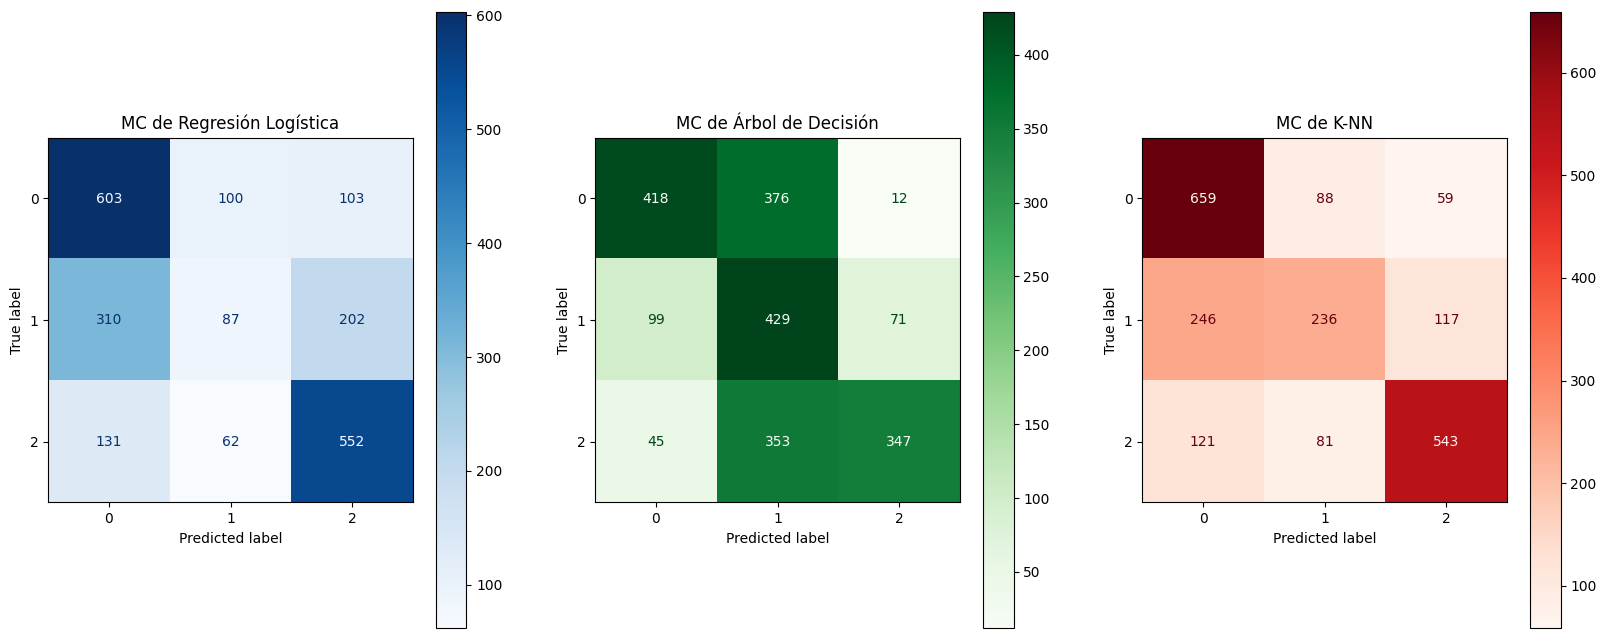

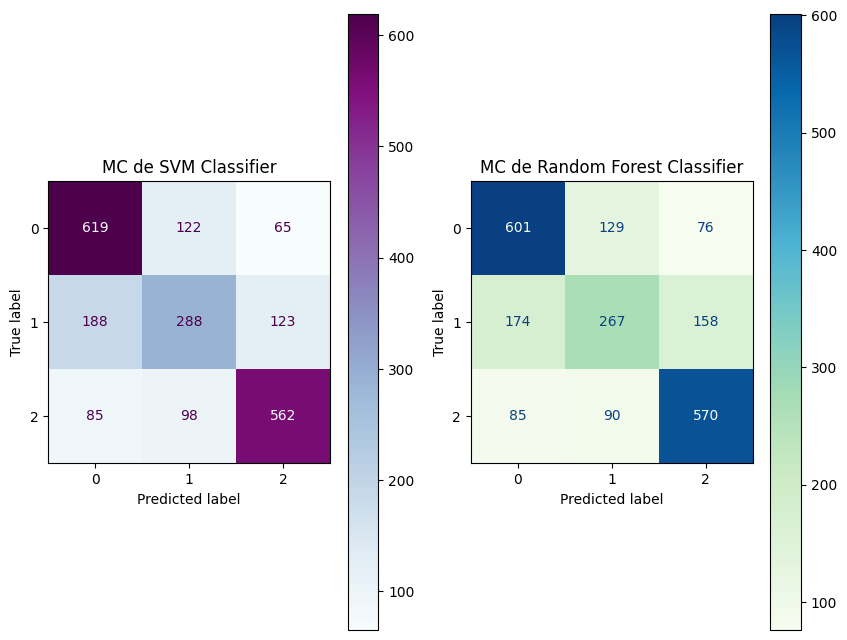

In [53]:
cm_lr_tam = confusion_matrix(y_tam_cat, y_lr_pred_tam)
cm_dt_tam = confusion_matrix(y_tam_cat, y_dt_pred_tam)
cm_knn_tam = confusion_matrix(y_tam_cat, y_knn_pred_tam)
cm_svc_tam = confusion_matrix(y_tam_cat, y_svc_pred_tam)
cm_rfc_tam = confusion_matrix(y_tam_cat, y_rfc_pred_tam)


fig, axs = plt.subplots(1, 3, figsize=(20,8))

cm_lr_display_tam = ConfusionMatrixDisplay(cm_lr_tam).plot(ax=axs[0], cmap='Blues')
axs[0].set_title('MC de Regresión Logística')
ccm_dt_display_tam = ConfusionMatrixDisplay(cm_dt_tam).plot(ax=axs[1], cmap='Greens')
axs[1].set_title('MC de Árbol de Decisión')
cm_knn_display_tam = ConfusionMatrixDisplay(cm_knn_tam).plot(ax=axs[2], cmap='Reds')
axs[2].set_title('MC de K-NN')

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,8))

cm_svc_display_tam = ConfusionMatrixDisplay(cm_svc_tam).plot(ax=axs[0], cmap='BuPu')
axs[0].set_title('MC de SVM Classifier')
ccm_rfc_display_tam = ConfusionMatrixDisplay(cm_rfc_tam).plot(ax=axs[1], cmap='GnBu')
axs[1].set_title('MC de Random Forest Classifier')

plt.show()

### Informes / Reports de Clasificación (Métricas)

In [54]:
print (f'Report de clasificación de la Regresión Logística:\n{classification_report(y_tam_cat, y_lr_pred_tam)}\n')
print (f'Report de clasificación del Árbol de Decisión:\n{classification_report(y_tam_cat, y_dt_pred_tam)}\n')
print (f'Report de clasificación del K-Nearest Neighbours:\n{classification_report(y_tam_cat, y_knn_pred_tam)}\n')
print (f'Report de clasificación del SVM (Clasifier):\n{classification_report(y_tam_cat, y_svc_pred_tam)}\n')
print (f'Report de clasificación del Random Forest Clasifier:\n{classification_report(y_tam_cat, y_rfc_pred_tam)}')

Report de clasificación de la Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.58      0.75      0.65       806
         1.0       0.35      0.15      0.21       599
         2.0       0.64      0.74      0.69       745

    accuracy                           0.58      2150
   macro avg       0.52      0.54      0.52      2150
weighted avg       0.54      0.58      0.54      2150


Report de clasificación del Árbol de Decisión:
              precision    recall  f1-score   support

         0.0       0.74      0.52      0.61       806
         1.0       0.37      0.72      0.49       599
         2.0       0.81      0.47      0.59       745

    accuracy                           0.56      2150
   macro avg       0.64      0.57      0.56      2150
weighted avg       0.66      0.56      0.57      2150


Report de clasificación del K-Nearest Neighbours:
              precision    recall  f1-score   support

         0.0       0.64      0.82

## Conclusiones Tamaño:

En el caso del tamaño también conseguimos una precisión promedio aceptable, mucho mejor que en la regresión, de 0,67, para el SVM, por lo que ese es el modelo que vamos a guardar.

In [55]:
pickle.dump(model_final_svc_tam , open("Models/modelo_svc_tam_final.pkl", "wb"))